In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [32]:
os.chdir(r"C:\Users\reece\Downloads\BANA 7360")
os.getcwd()

'C:\\Users\\reece\\Downloads\\BANA 7360'

In [2]:
df = pd.read_csv("JTU1000LDL.csv",index_col=0,parse_dates=True)
df.head()

,JTU1000LDL
DATE,
2000-12-01,2201
2001-01-01,2894
2001-02-01,1444
2001-03-01,1568
2001-04-01,1768


<Axes: xlabel='DATE'>

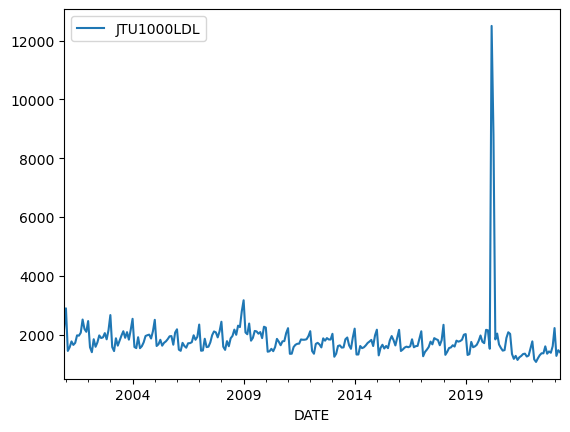

In [3]:
df.plot()

In [4]:
# Classical Decomposition 

In [7]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import DecomposeResult
plt.rcParams['figure.figsize'] = [14.0,10.0]

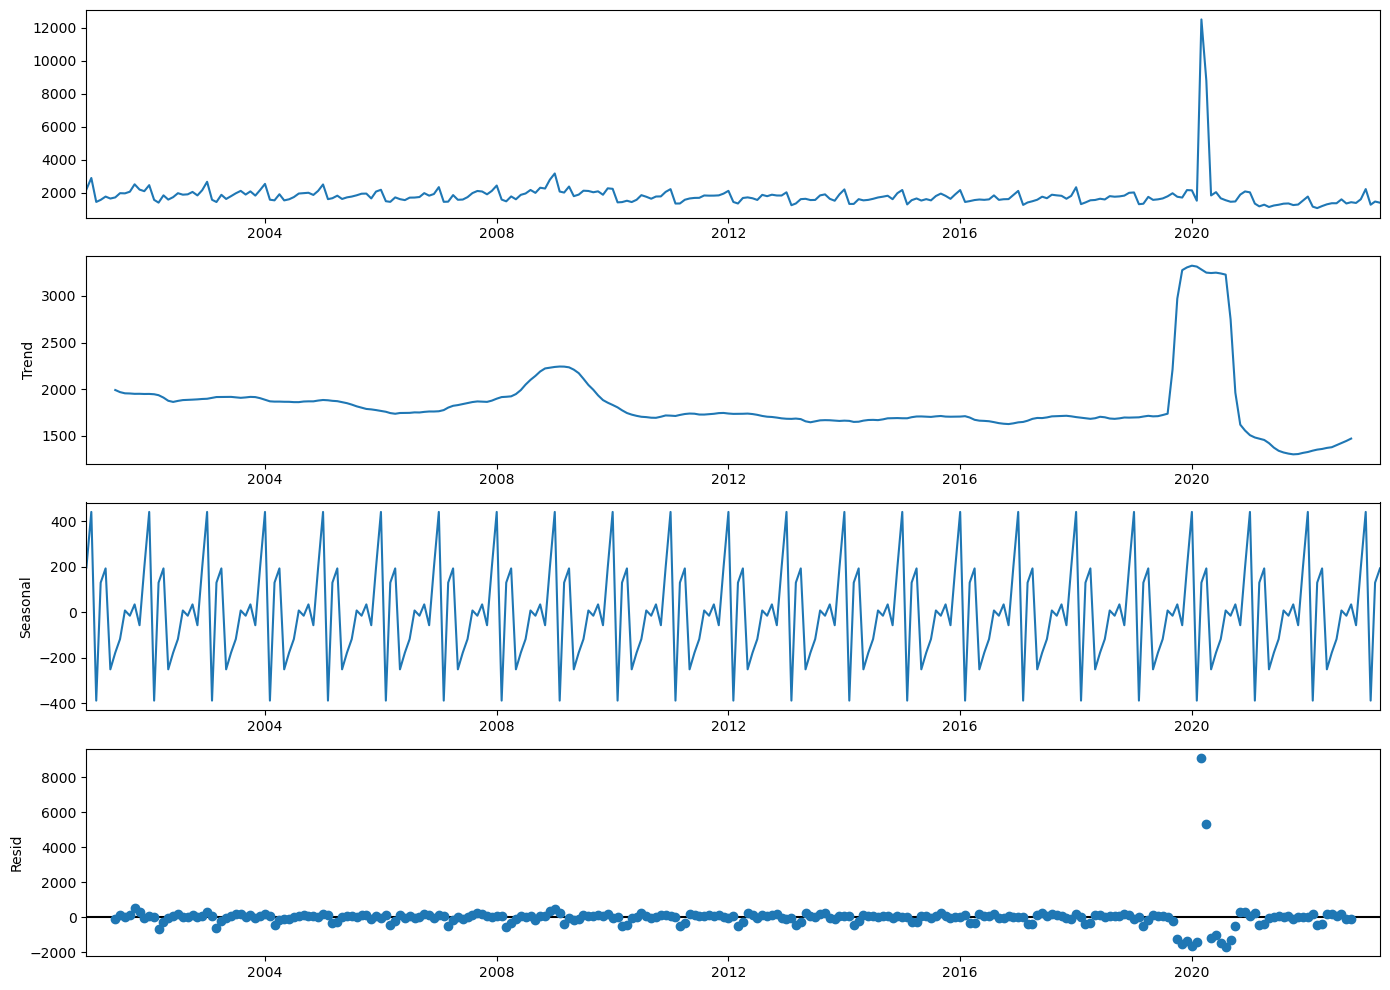

In [9]:
# Additive 
decomposition_a = sm.tsa.seasonal_decompose(df,model='additive')
fig = decomposition_a.plot()

In [35]:
df['Observed'] = decomposition_a.observed
df['Trend'] = decomposition_a.trend # short coming of classical decomposition 
df['Seasonal'] = decomposition_a.seasonal
df['Resid'] = decomposition_a.resid
df

,JTU1000LDL,Observed,Trend,Seasonal,Resid
DATE,,,,,
2000-12-01,2201,2201.0,NaN,197.570820,NaN
2001-01-01,2894,2894.0,NaN,442.007328,NaN
2001-02-01,1444,1444.0,NaN,-388.679180,NaN
2001-03-01,1568,1568.0,NaN,130.600582,NaN
2001-04-01,1768,1768.0,NaN,193.360502,NaN
...,...,...,...,...,...
2022-12-01,1606,1606.0,NaN,197.570820,NaN
2023-01-01,2222,2222.0,NaN,442.007328,NaN
2023-02-01,1275,1275.0,NaN,-388.679180,NaN


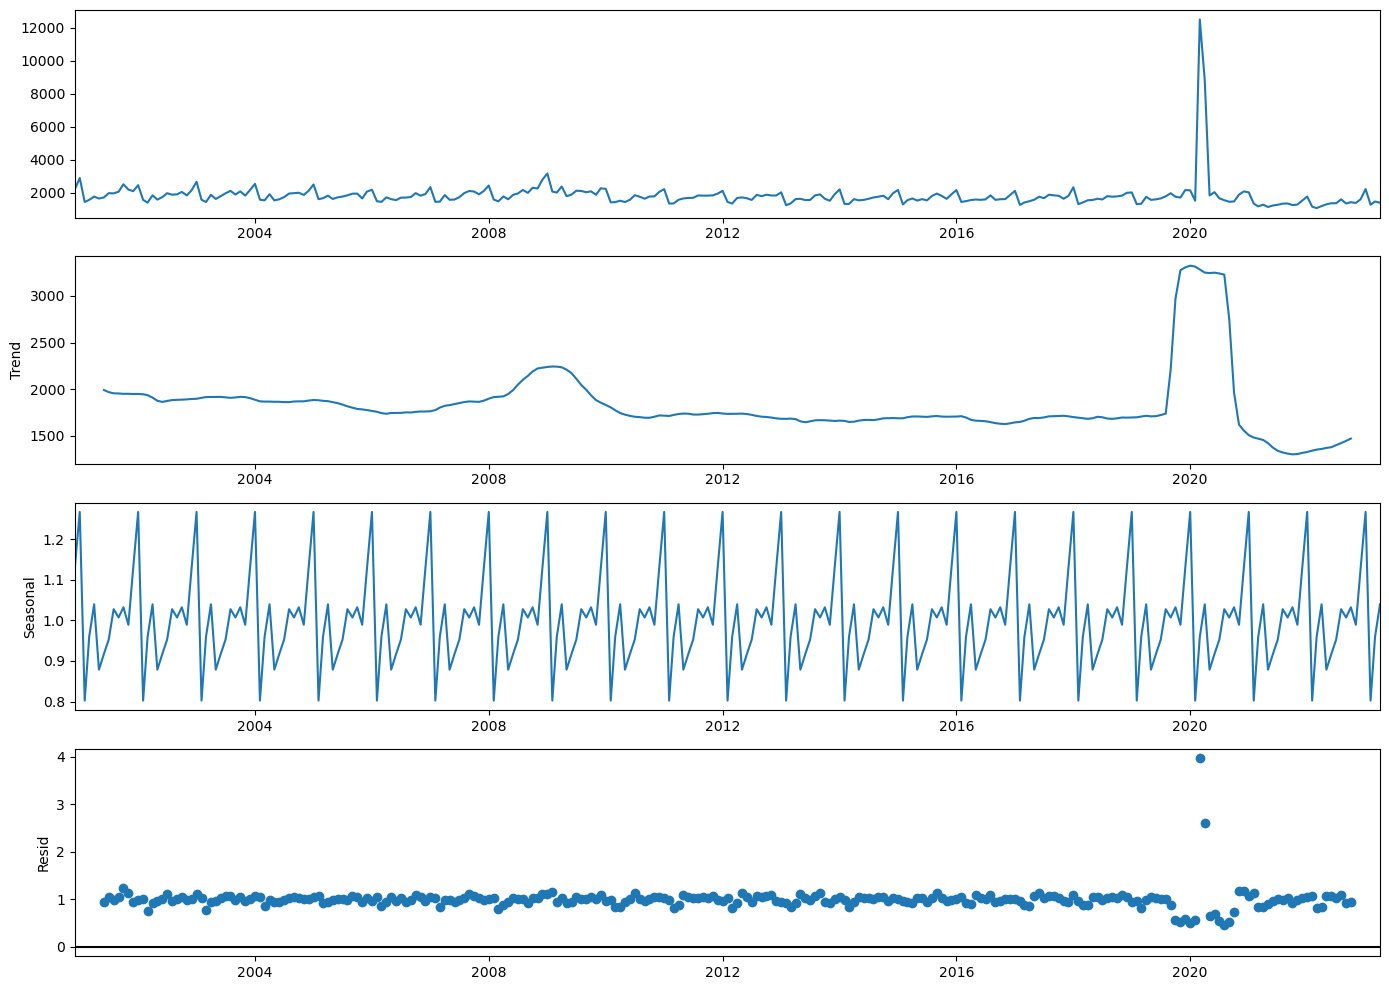

In [10]:
decomposition_m = sm.tsa.seasonal_decompose(df,model='multiplicative')
fig = decomposition_m.plot()

In [12]:
df['Observed'] = decomposition_m.observed
df['Trend'] = decomposition_m.trend # short coming of classical decomposition 
df['Seasonal'] = decomposition_m.seasonal
df['Resid'] = decomposition_m.resid
df

,JTU1000LDL,Observed,Trend,Seasonal,Resid
DATE,,,,,
2000-12-01,2201,2201.0,NaN,1.128520,NaN
2001-01-01,2894,2894.0,NaN,1.266896,NaN
2001-02-01,1444,1444.0,NaN,0.802289,NaN
2001-03-01,1568,1568.0,NaN,0.959415,NaN
2001-04-01,1768,1768.0,NaN,1.039399,NaN
...,...,...,...,...,...
2022-12-01,1606,1606.0,NaN,1.128520,NaN
2023-01-01,2222,2222.0,NaN,1.266896,NaN
2023-02-01,1275,1275.0,NaN,0.802289,NaN


In [13]:
# STL decomposition

In [24]:
from statsmodels.tsa.seasonal import STL
df = pd.read_csv('JTU1000LDL.csv',index_col=0,parse_dates=True)
df

,JTU1000LDL
DATE,
2000-12-01,2201
2001-01-01,2894
2001-02-01,1444
2001-03-01,1568
2001-04-01,1768
...,...
2022-12-01,1606
2023-01-01,2222
2023-02-01,1275


In [25]:
df.index

DatetimeIndex(['2000-12-01', '2001-01-01', '2001-02-01', '2001-03-01',
               '2001-04-01', '2001-05-01', '2001-06-01', '2001-07-01',
               '2001-08-01', '2001-09-01',
               ...
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01'],
              dtype='datetime64[ns]', name='DATE', length=269, freq=None)

In [26]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['2000-12-01', '2001-01-01', '2001-02-01', '2001-03-01',
               '2001-04-01', '2001-05-01', '2001-06-01', '2001-07-01',
               '2001-08-01', '2001-09-01',
               ...
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01'],
              dtype='datetime64[ns]', name='DATE', length=269, freq='MS')

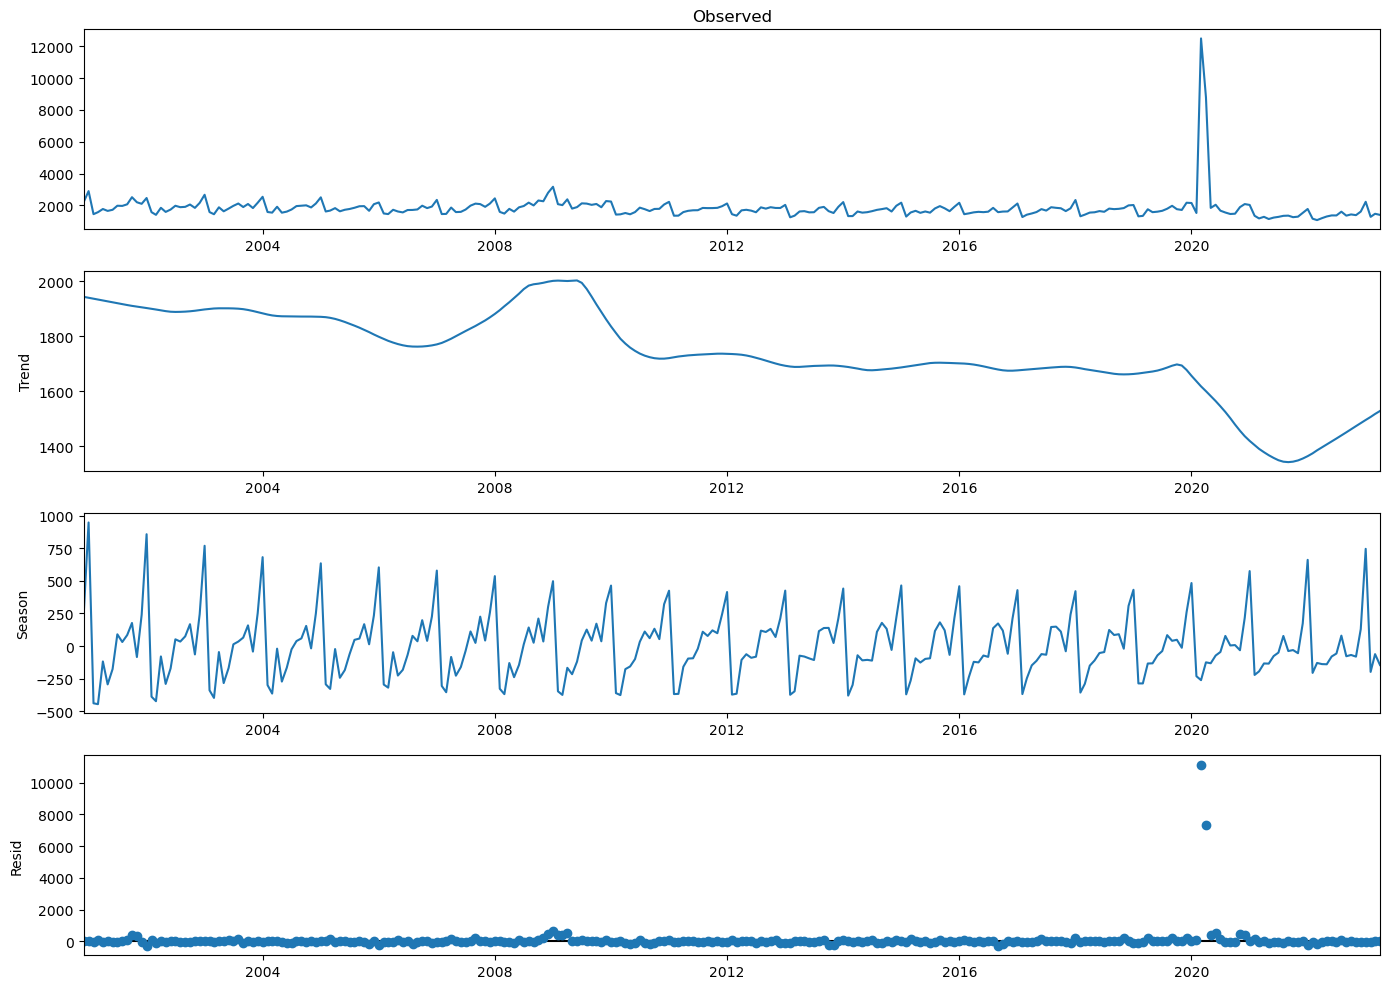

In [28]:
plt.rcParams['figure.figsize'] = [14.0,10.0]
model = STL(df,robust=True)
fit = model.fit()
fit.plot()
plt.show()

In [29]:
df['Observed'] = fit.observed
df['Trend'] = fit.trend # short coming of classical decomposition 
df['Seasonal'] = fit.seasonal
df['Resid'] = fit.resid
df

,JTU1000LDL,Observed,Trend,Seasonal,Resid
DATE,,,,,
2000-12-01,2201,2201,1943.796671,233.988170,23.215160
2001-01-01,2894,2894,1940.390890,948.923050,4.686060
2001-02-01,1444,1444,1937.030504,-439.813591,-53.216912
2001-03-01,1568,1568,1933.699240,-446.547029,80.847789
2001-04-01,1768,1768,1930.396294,-118.656337,-43.739957
...,...,...,...,...,...
2022-12-01,1606,1606,1485.048838,130.147141,-9.195980
2023-01-01,2222,2222,1496.144126,746.540311,-20.684437
2023-02-01,1275,1275,1507.127407,-198.618577,-33.508829
